In [2]:
pip install statsmodels

You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
from fosforml.model_manager.snowflakesession import get_session
my_session = get_session()
 
table_name = 'Fact_Customer_Orders'
 
sf_df = my_session.sql("select * from {}".format(table_name))
df = sf_df.to_pandas()

In [24]:
df.columns

Index(['ORDER_ID', 'PRODUCT_ID', 'ORDER_QTY', 'ORDER_DATE'], dtype='object')

In [25]:
data = df[['PRODUCT_ID','ORDER_QTY','ORDER_DATE']]

In [26]:
#Convert order_date to datetime format
data['ORDER_DATE'] = pd.to_datetime(data['ORDER_DATE'])

In [28]:
#Aggregate data by date and sum of quantities per day
data_daily= data.groupby('ORDER_DATE').agg({'ORDER_QTY':'sum'}).reset_index()

In [30]:
#set order_date as index required for time series analysis
data_daily.set_index('ORDER_DATE',inplace=True)

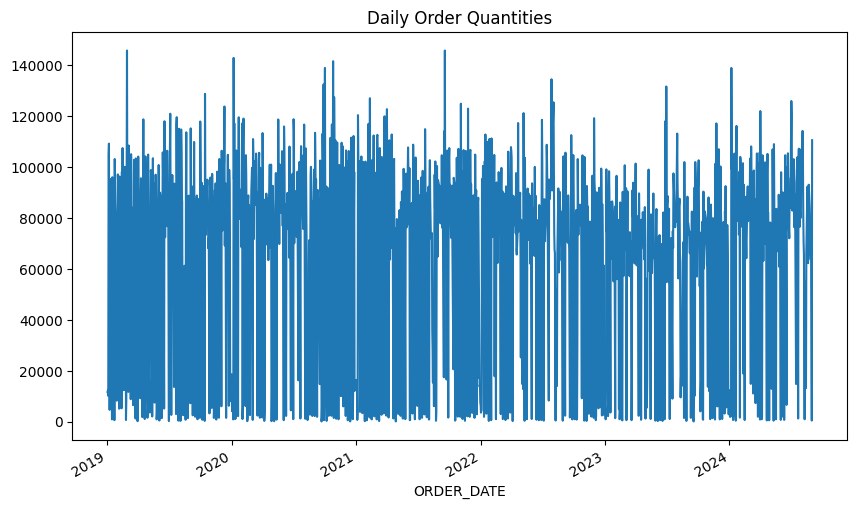

In [32]:
# Plot the data to observe trends
data_daily['ORDER_QTY'].plot(figsize=(10, 6))
plt.title('Daily Order Quantities')
plt.show()

In [34]:
# Check for stationarity using Augmented Dickey-Fuller test
def check_stationarity(timeseries):
    result = adfuller(timeseries)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    if result[1] > 0.05:
        print("The data is non-stationary. Differencing is required.")
    else:
        print("The data is stationary.")

check_stationarity(data_daily['ORDER_QTY'])


ADF Statistic: -7.601720
p-value: 0.000000
The data is stationary.


In [35]:
df.duplicated().sum()

0

In [36]:
df.corr(numeric_only=True)

,ORDER_QTY
ORDER_QTY,1.0
